# Proyek Machine Learning
## Integrasi Unsupervised Learning (Clustering) dan Supervised Learning (Klasifikasi)

---

# Penting
Notebook ini disusun mengikuti template dan ketentuan penilaian yang telah ditetapkan.  
Setiap tahapan dilakukan secara berurutan untuk memastikan proses machine learning berjalan dengan benar dan dapat dievaluasi dengan baik.

---

# Informasi Dataset
Dataset yang digunakan merupakan hasil modifikasi dari dataset Kaggle *Bank Transaction Dataset for Fraud Detection*  
yang disediakan melalui Google Drive sesuai dengan instruksi proyek.

---

## 1. Import Library
Pada tahap ini dilakukan proses import library yang dibutuhkan untuk analisis data, pembangunan model clustering, dan klasifikasi.

### Output yang diharapkan:
- Library berhasil diimpor tanpa error

---

## 2. Memuat Dataset
Dataset dimuat ke dalam notebook dan dilakukan eksplorasi awal untuk memahami struktur data.

### Output yang diharapkan:
- Dataset berhasil dimuat
- Menampilkan 5 data teratas
- Informasi dataset tampil
- Statistik deskriptif dataset tampil

---

## 3. Pembersihan dan Pra Pemrosesan Data
Tahap ini bertujuan untuk membersihkan data dari nilai kosong, duplikasi, serta melakukan transformasi data agar siap digunakan dalam proses pemodelan.

### Output yang diharapkan:
- Data bebas dari nilai kosong dan duplikasi
- Kolom yang tidak relevan telah dihapus
- Fitur kategorikal telah dilakukan encoding
- Fitur numerik telah dilakukan scaling
- Data siap digunakan untuk modeling

---

## 4. Membangun Model Clustering
Pada tahap ini dilakukan proses clustering menggunakan algoritma K-Means untuk membentuk label atau kelas pada dataset.

### Output yang diharapkan:
- Visualisasi Elbow Method
- Model K-Means terbentuk
- Nilai Silhouette Score ditampilkan
- Visualisasi hasil clustering

---

## 5. Interpretasi Cluster

### a. Interpretasi Hasil Clustering
Pada bagian ini dilakukan analisis karakteristik tiap cluster berdasarkan fitur-fitur yang ada.

⚠️ **PERHATIAN: JAWAB DI BAWAH INI**

---

## 6. Mengekspor Data Hasil Clustering
Dataset hasil preprocessing dan clustering diekspor untuk digunakan pada tahap klasifikasi.

### Output yang diharapkan:
- Dataset memiliki kolom Target
- Dataset berhasil disimpan dalam format CSV

---

# Tahap Klasifikasi (Supervised Learning)

---

## 7. Data Splitting
Dataset dibagi menjadi data latih dan data uji untuk proses klasifikasi.

### Output yang diharapkan:
- Data training dan testing terbentuk

---

## 8. Membangun Model Klasifikasi
Pada tahap ini dilakukan pembangunan model klasifikasi menggunakan algoritma Decision Tree dan algoritma tambahan lainnya.

### Output yang diharapkan:
- Model Decision Tree terbentuk
- Model tambahan berhasil dibangun
- Evaluasi performa model ditampilkan

---

## 9. Hyperparameter Tuning
Tahap ini bertujuan untuk meningkatkan performa model klasifikasi dengan melakukan tuning hyperparameter.

### Output yang diharapkan:
- Model hasil tuning terbentuk
- Evaluasi performa model hasil tuning ditampilkan

---

# Kesimpulan
Bagian ini berisi ringkasan hasil clustering dan klasifikasi serta insight yang diperoleh dari model yang dibangun.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
import joblib

In [3]:
# Load dataset
df = pd.read_csv("bank_transactions_data_edited.csv")

# Tampilkan 5 data teratas
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Informasi dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Statistik deskriptif
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Penilaian (Opsional)
Pada tahap ini dilakukan eksplorasi awal dataset untuk memahami struktur, tipe fitur, dan ringkasan statistik data. 
Informasi ini digunakan sebagai dasar dalam menentukan strategi pembersihan data dan pemodelan pada tahap berikutnya.


Matplotlib is building the font cache; this may take a moment.


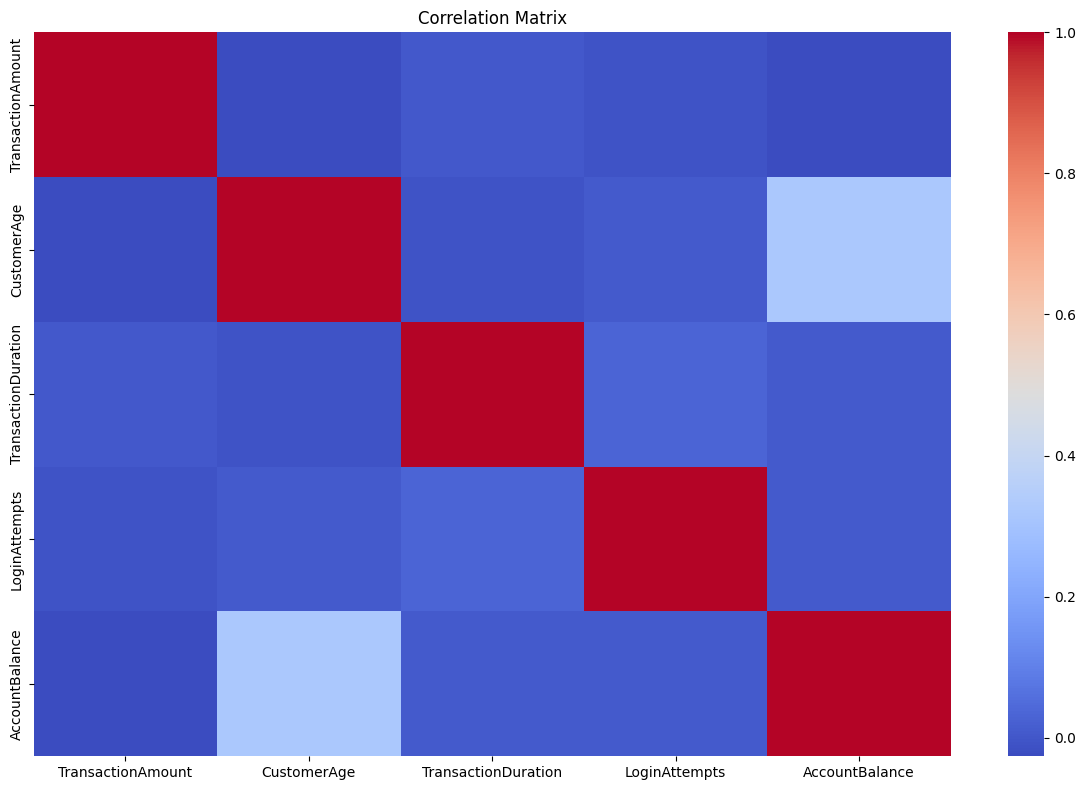

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

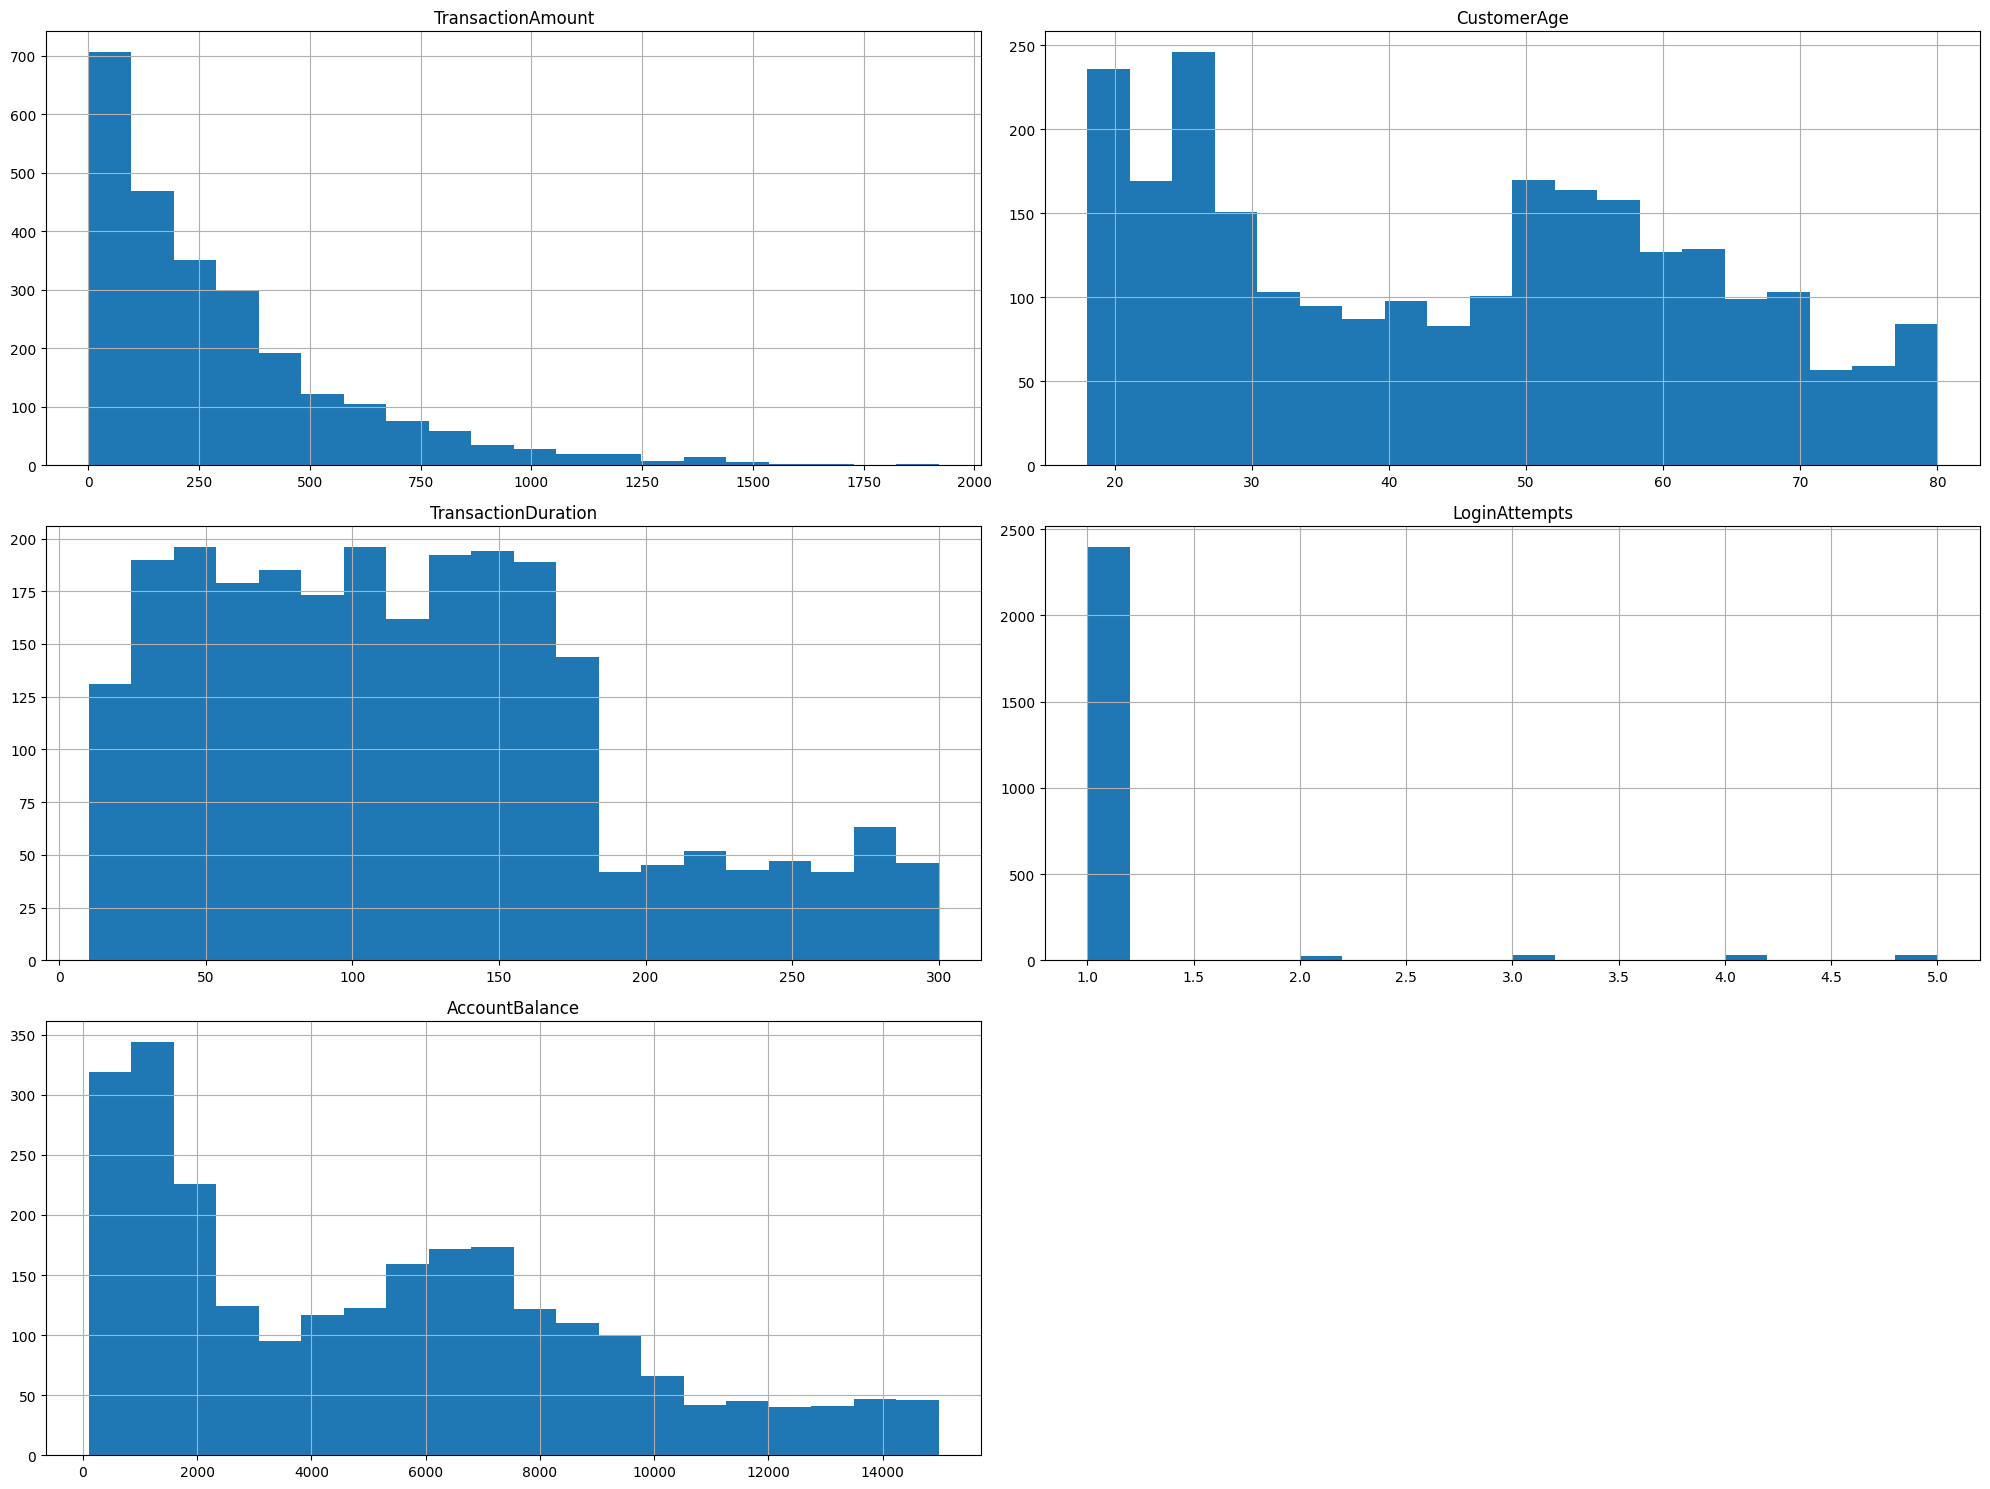

In [7]:
df.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

### Penilaian (Opsional)
Visualisasi histogram digunakan untuk melihat distribusi data pada setiap fitur. 
Hal ini membantu dalam mengidentifikasi pola distribusi dan potensi outlier pada dataset.


In [19]:
# Cek missing value
df.isnull().sum()


TransactionAmount          0
TransactionType            0
Location                   0
IP Address                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [20]:
# Cek data duplikat
df.duplicated().sum()

np.int64(0)

In [21]:
# Hapus baris yang memiliki nilai kosong
df = df.dropna()

# Hapus data duplikat
df = df.drop_duplicates()

In [22]:
columns_to_drop = [
    'TransactionID',
    'AccountID',
    'DeviceID',
    'IPAddress',
    'MerchantID',
    'TransactionDate'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [24]:
import numpy as np

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

In [26]:
# Binning fitur numerik (ganti sesuai kolom asli)
df_scaled['TransactionAmount_Bin'] = pd.cut(
    df_scaled['TransactionAmount'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

# Encode hasil binning
le_bin = LabelEncoder()
df_scaled['TransactionAmount_Bin'] = le_bin.fit_transform(
    df_scaled['TransactionAmount_Bin']
)

### Penilaian 
Pada tahap ini dilakukan pembersihan dan pra pemrosesan data yang meliputi penanganan nilai kosong, penghapusan data duplikat, 
penghapusan kolom yang tidak relevan, encoding fitur kategorikal, penanganan outlier, scaling fitur numerik, 
serta binning pada fitur numerik tertentu. 
Tahapan ini bertujuan untuk memastikan data siap digunakan dalam proses clustering.

In [ ]:
df_scaled.select_dtypes(include=['int64', 'float64']).columns


Index(['TransactionAmount', 'TransactionType', 'Location', 'IP Address',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TransactionAmount_Bin'],
      dtype='object')

In [28]:
# Hapus kolom binning lama jika sudah ada
if 'TransactionAmount_Bin' in df_scaled.columns:
    df_scaled = df_scaled.drop(columns=['TransactionAmount_Bin'])


In [29]:
from sklearn.preprocessing import LabelEncoder

# Binning fitur TransactionAmount
df_scaled['TransactionAmount_Bin'] = pd.cut(
    df_scaled['TransactionAmount'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

# Encode hasil binning
le_bin = LabelEncoder()
df_scaled['TransactionAmount_Bin'] = le_bin.fit_transform(
    df_scaled['TransactionAmount_Bin']
)

In [37]:
# Validasi hasil preprocessing dan binning
df_scaled.columns

df_scaled['TransactionAmount_Bin'].value_counts()

df_scaled.dtypes

df_scaled[['TransactionAmount', 'TransactionAmount_Bin']].head()


,TransactionAmount,TransactionAmount_Bin
0,-1.137236,1
1,0.695366,2
2,-0.569466,1
3,-0.274903,1
5,-0.742226,1


c:\Users\asus\Documents\GitHub\dicoding-machine-learning-project\venv\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\asus\Documents\GitHub\dicoding-machine-learning-project\venv\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


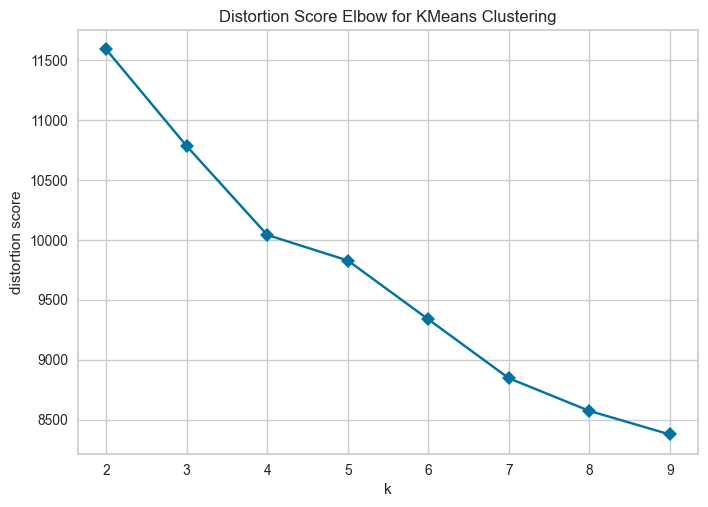

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(
    model,
    k=(2, 10),
    metric='distortion',
    timings=False
)

visualizer.fit(df_scaled)
visualizer.show()


In [40]:
# Tentukan jumlah cluster terbaik
k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)


In [41]:
joblib.dump(kmeans, "model_clustering")


['model_clustering']

In [42]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.1251


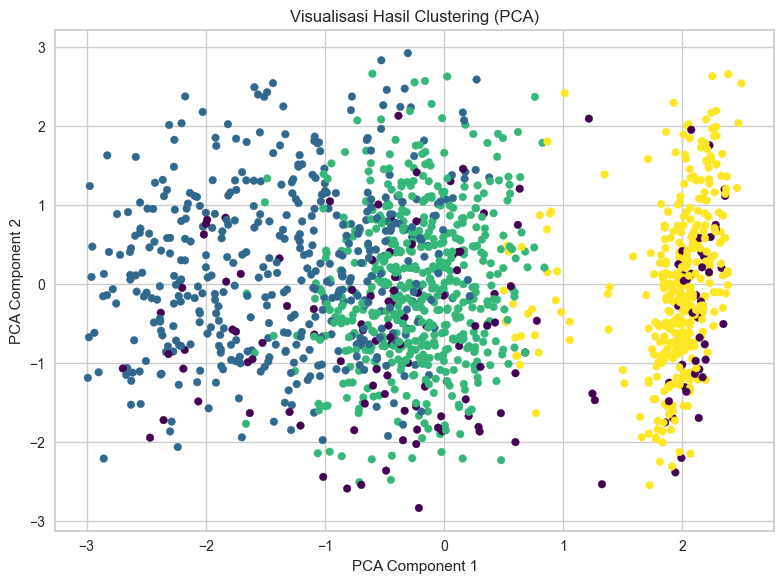

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title("Visualisasi Hasil Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


In [44]:
joblib.dump(pca, "PCA_model_clustering.h5")


['PCA_model_clustering.h5']

### 
Visualisasi hasil clustering menggunakan PCA menunjukkan bahwa data terbagi ke dalam beberapa kelompok.
Meskipun terdapat tumpang tindih antar cluster, satu cluster terlihat cukup terpisah,
yang mengindikasikan adanya perbedaan karakteristik yang signifikan pada kelompok tersebut.


In [45]:
# Tambahkan label cluster ke data scaled
df_scaled['Target'] = cluster_labels


In [46]:
# Analisis statistik per cluster (numerik)
cluster_summary = df_scaled.groupby('Target').agg(['mean', 'min', 'max'])
cluster_summary


TransactionAmount                     TransactionType            \
                    mean       min       max            mean  min  max   
Target                                                                   
0               2.125579  1.402295  2.804971             0.0  0.0  0.0   
1              -0.206067 -1.206916  1.906508             0.0  0.0  0.0   
2              -0.245487 -1.204285  1.449559             0.0  0.0  0.0   
3              -0.274605 -1.207220  1.428204             0.0  0.0  0.0   

        Location                     IP Address  ... LoginAttempts  \
            mean       min       max       mean  ...           max   
Target                                           ...                 
0      -0.060805 -1.717696  1.695347  -0.063992  ...           0.0   
1       0.060614 -1.717696  1.695347   0.026726  ...           0.0   
2      -0.028766 -1.717696  1.695347  -0.065021  ...           0.0   
3      -0.008404 -1.717696  1.695347   0.089648  ...           0.0   

       AccountBalance                     PreviousTransactionDate            \
                 mean       min       max                    mean       min   
Target                                                                        
0           -0.141709 -1.279335  2.431928                0.044512 -1.756967   
1            1.096025 -0.171154  2.564815               -0.014427 -1.766788   
2           -0.280821 -1.280685  0.758819                0.012392 -1.766788   
3           -0.912285 -1.277974  1.203762               -0.018940 -1.737325   

                 TransactionAmount_Bin          
             max                  mean min max  
Target                                          
0       1.729523              0.013423   0   2  
1       1.749165              1.291480   0   2  
2       1.758986              1.308429   1   2  
3       1.749165              1.267045   1   2  

[4 rows x 36 columns]

In [47]:
# Inverse scaling untuk fitur numerik
df_inverse = df_scaled.copy()
df_inverse[numeric_columns] = scaler.inverse_transform(
    df_scaled[numeric_columns]
)


In [48]:
# Inverse encoding untuk fitur kategorikal
for col, le in label_encoders.items():
    df_inverse[col] = le.inverse_transform(df_inverse[col])


In [49]:
# Analisis deskriptif setelah inverse
cluster_summary_inverse = df_inverse.groupby('Target').agg(['mean', 'min', 'max'])
cluster_summary_inverse


TransactionAmount                 TransactionType             Location  \
                    mean     min     max            mean  min  max       mean   
Target                                                                          
0             658.871812  515.94  793.13             1.0  1.0  1.0  20.389262   
1             198.103094    0.32  615.58             1.0  1.0  1.0  21.883408   
2             190.313065    0.84  525.28             1.0  1.0  1.0  20.783525   
3             184.558864    0.26  521.06             1.0  1.0  1.0  21.034091   

                   IP Address  ... LoginAttempts AccountBalance           \
        min   max        mean  ...           max           mean      min   
Target                         ...                                         
0       0.0  42.0  283.315436  ...           1.0    4515.604228   117.98   
1       0.0  42.0  298.298206  ...           1.0    9300.210516  4401.78   
2       0.0  42.0  283.145594  ...           1.0    3977.852701   112.76   
3       0.0  42.0  308.690341  ...           1.0    1536.854659   123.24   

                 PreviousTransactionDate             TransactionAmount_Bin  \
             max                    mean  min    max                  mean   
Target                                                                       
0       14464.30              184.429530  1.0  356.0              0.013423   
1       14977.99              178.428251  0.0  358.0              1.291480   
2        7996.70              181.159004  0.0  359.0              1.308429   
3        9716.68              177.968750  3.0  358.0              1.267045   

                
       min max  
Target          
0        0   2  
1        0   2  
2        1   2  
3        1   2  

[4 rows x 36 columns]

In [50]:
df_inverse['Target'] = df_scaled['Target']
df_inverse.to_csv("data_clustering_inverse.csv", index=False)

### a. Interpretasi Hasil Clustering

Berdasarkan hasil analisis deskriptif pada data yang telah dikembalikan ke skala aslinya (inverse transform),
diperoleh karakteristik masing-masing cluster sebagai berikut:

**Cluster 0**
- Memiliki rata-rata TransactionAmount paling tinggi dibandingkan cluster lain (sekitar 658).
- AccountBalance rata-rata berada pada kisaran menengah (± 4.500).
- Mengindikasikan kelompok pengguna dengan nilai transaksi relatif besar namun tidak selalu memiliki saldo akun tertinggi.
- Kelompok ini dapat dikategorikan sebagai pengguna dengan aktivitas transaksi tinggi.

**Cluster 1**
- Memiliki TransactionAmount rata-rata lebih rendah (sekitar 198) dibandingkan Cluster 0.
- Memiliki AccountBalance rata-rata paling tinggi (± 9.300).
- Menunjukkan pengguna dengan saldo akun besar namun melakukan transaksi dalam jumlah yang lebih moderat.
- Kelompok ini mencerminkan pengguna yang relatif stabil dan cenderung berhati-hati dalam bertransaksi.

**Cluster 2**
- TransactionAmount rata-rata berada pada tingkat menengah ke rendah (sekitar 190).
- AccountBalance rata-rata berada pada kisaran menengah (± 3.900).
- Karakteristiknya menunjukkan pengguna dengan aktivitas transaksi yang cukup aktif namun dengan saldo akun yang tidak terlalu besar.
- Kelompok ini dapat dikategorikan sebagai pengguna reguler.

**Cluster 3**
- Memiliki TransactionAmount rata-rata paling rendah (sekitar 185).
- AccountBalance rata-rata paling rendah dibandingkan cluster lainnya (± 1.500).
- Mengindikasikan pengguna dengan aktivitas transaksi rendah dan saldo akun yang relatif kecil.
- Kelompok ini mencerminkan pengguna dengan intensitas transaksi yang minimal.
